# Gradients
***

### Setup

In [1]:
#notebook imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# loading in images
sudoku = cv2.imread('../Image_Data/sudoku.jpg')
sudoku = cv2.cvtColor(sudoku, cv2.COLOR_BGR2RGB)
gray_sudoku = cv2.cvtColor(sudoku, cv2.COLOR_RGB2GRAY)

In [44]:
# method to view images
def view_img(img):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

***
### Sobel Operator
The sobel operator is used process images to emphasize edges for edge detection. The sobel operator calculates derivative approximations in both the x and y directions, up to the 3rd degree using a kernel. The x-direction increases to the right, and the y-direction increases downward when taking the derivatives. 

Link to the math and sobel kernel: https://en.wikipedia.org/wiki/Sobel_operator

Let's say I'm tasked with finding remaining open spots on a sudoku grid. I can use the sobel operator combined with other image processing techniques such as blending and thresholding to successfully process this image. The original image looks like this:

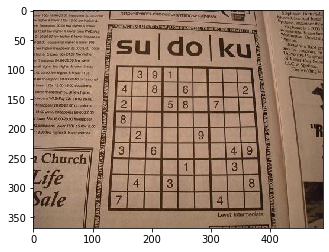

In [13]:
plt.imshow(sudoku)

The following is the opencv code for processing an image using the sobel operator and the first derivative in the x-direction. The kernel applied is of size 3. An important note is that the datatype of the resulting image is changed to 64 bit floating point numbers, or the datatype corresponding to double. This is done because some edges may be missed because all negative slopes using the uint8 datatype will automatically be set to zero.

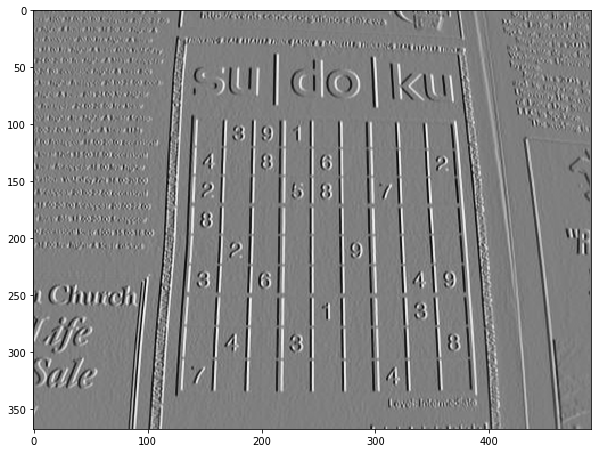

In [51]:
# xsobel
sobelx = cv2.Sobel(src=gray_sudoku, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
view_img(sobelx)

The resulting image in the y-direction can also be calculated using the sobel operator.

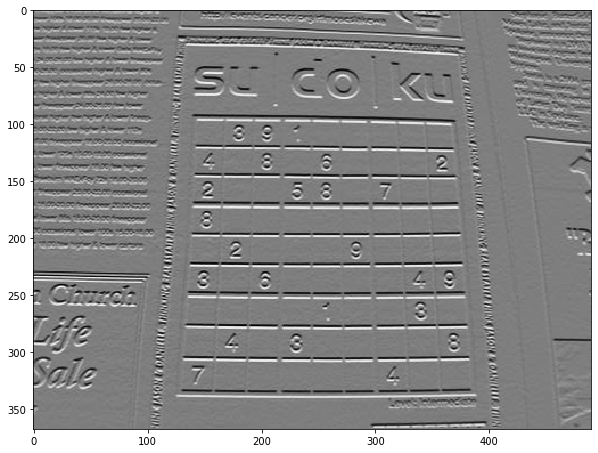

In [25]:
# ysobel
sobely = cv2.Sobel(src=gray_sudoku, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
view_img(sobely)

Now we can use blending to highlight the squares in both directions.

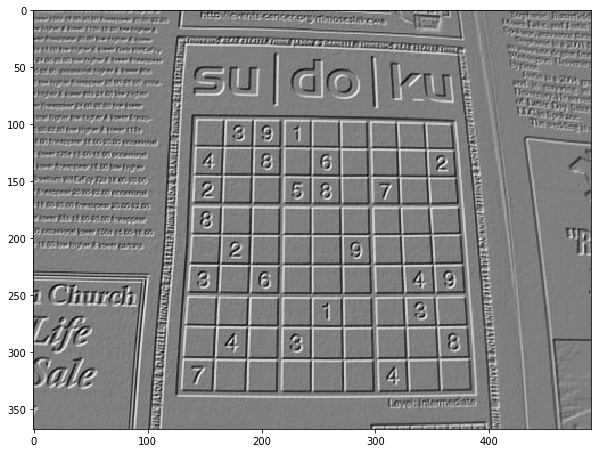

In [28]:
combined = cv2.addWeighted(src1=sobelx, alpha=0.5, src2=sobely, beta=0.5, gamma=0)
view_img(combined)

Finally, we can use thresholding to convert it into a binary image. The squares are very pronounced, and the open spots can easily be seen.

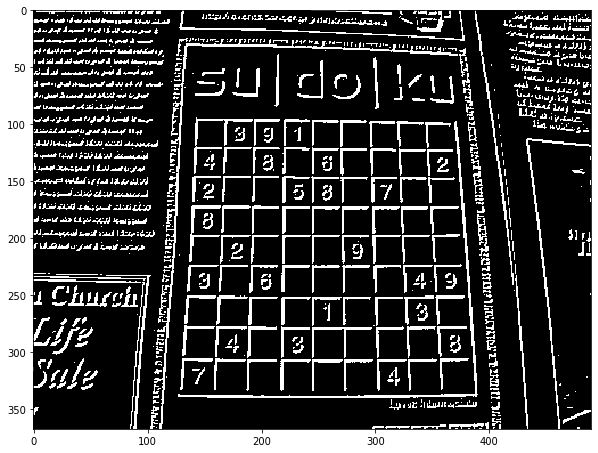

In [46]:
ret, result = cv2.threshold(src=combined, thresh=45, maxval=255, type=cv2.THRESH_BINARY)
view_img(result)

The resulting image should now be ready for other operations such as edge detection to detect the sudoku square and open square spaces.

***
### Laplacian Derivatives
Another way to process an image for edge detection is Laplacian derivatives. When the kernel size for the Laplacian is > 1, the second derivatives in both the x and y directions are calculated using the Sobel operator and added together. If the kernel size is 1, or the default, then the image is filtered using a separate Laplacian convolutional kernel.

Math and method description: https://docs.opencv.org/master/d5/d0f/tutorial_py_gradients.html

The following example uses the default Laplacian kernel. 

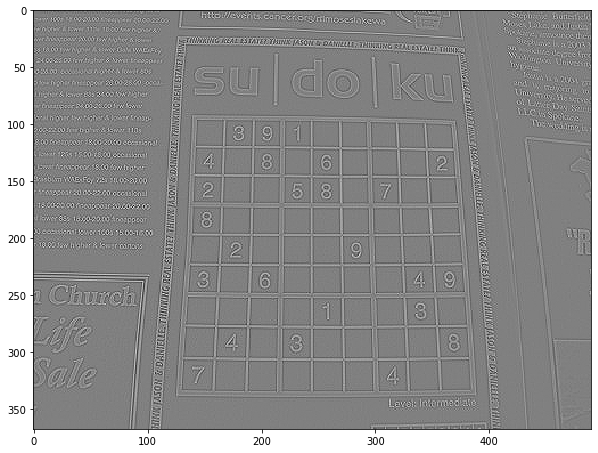

In [45]:
# laplacian
laplacian = cv2.Laplacian(src=gray_sudoku, ddepth=cv2.CV_64F)
view_img(laplacian)

We can then apply thresholding like before to achieve similar results.

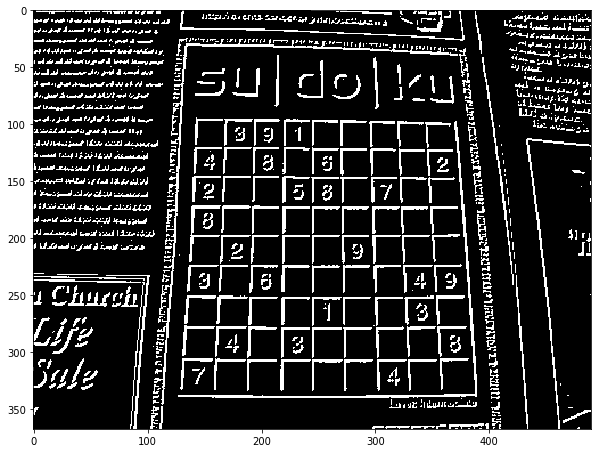

In [43]:
ret, resultL = cv2.threshold(src=combined, thresh=52, maxval=255, type=cv2.THRESH_BINARY)
view_img(resultL)

***
### References
* Sobel operator: https://en.wikipedia.org/wiki/Sobel_operator
* Kernels and convolution: https://en.wikipedia.org/wiki/Kernel_(image_processing)
* Sobel documentation: https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d
* Gradients example: https://docs.opencv.org/master/d5/d0f/tutorial_py_gradients.html
* Laplacian: https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm
***